# DDRNet Segmentation Model

https://github.com/chenjun2hao/DDRNet.pytorch

In [5]:
from DDRNet.tools.segmentation import DDRNet
import cv2
import matplotlib.pyplot as plt
import numpy as np

segmenter = DDRNet()

Ready for inference


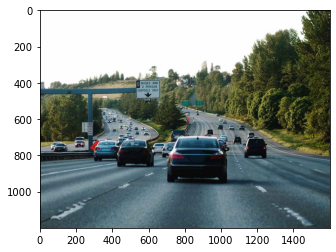

In [6]:
image = cv2.imread('dummy/cars.jpg', cv2.IMREAD_COLOR)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)) # Show results

In [7]:
pred = segmenter.segments(image)

inferred = pred[0].cpu().detach().numpy()
inferred = inferred[0, :, :, :]
inferred = inferred.transpose((1, 2, 0))

/home/mahsay/anaconda3/envs/agent0/lib/python3.7/site-packages/torch/nn/functional.py:3455: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode)


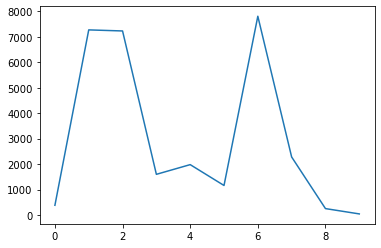

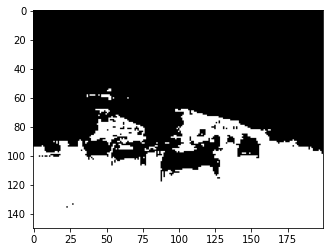

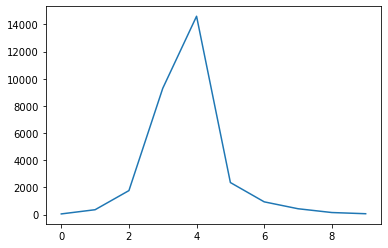

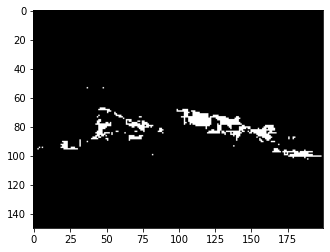

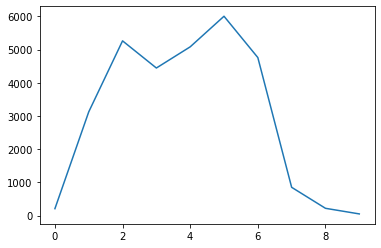

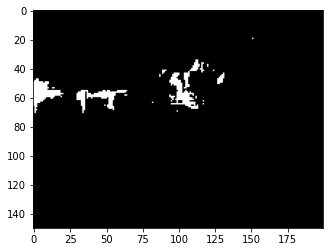

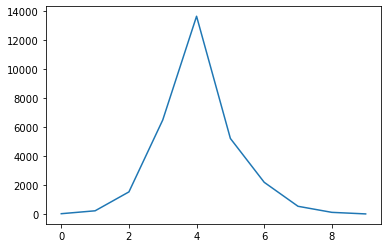

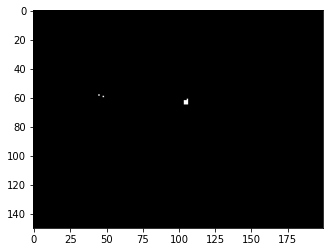

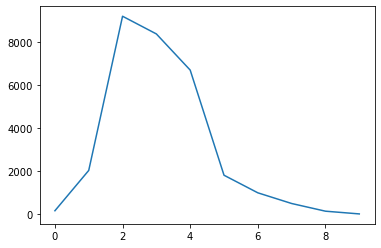

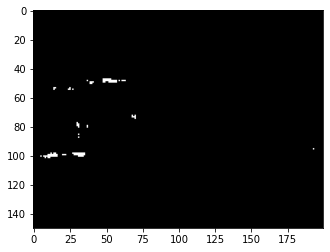

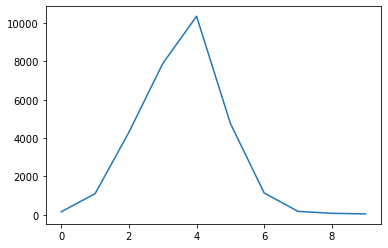

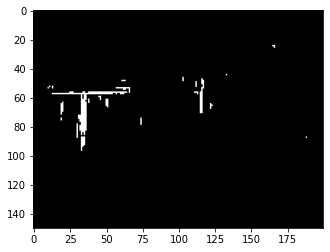

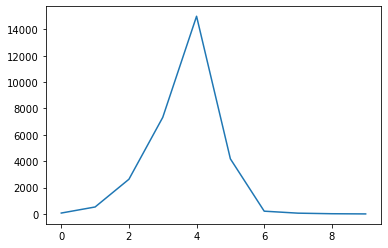

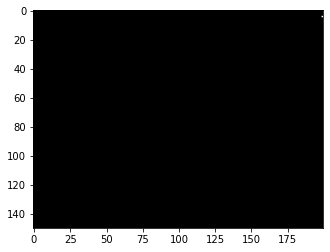

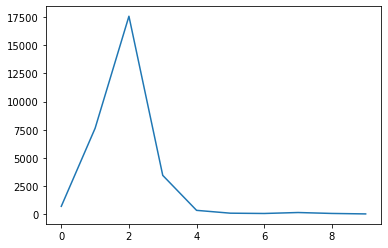

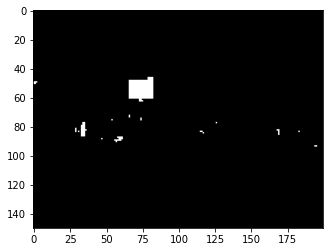

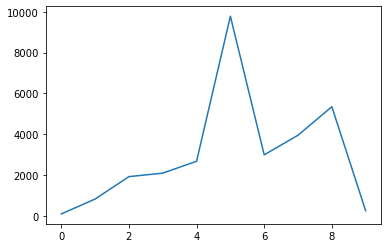

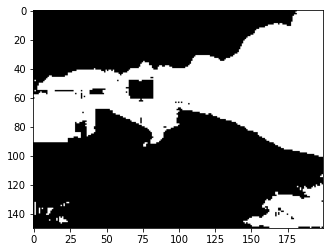

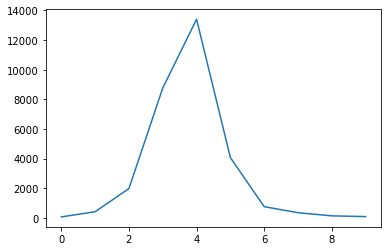

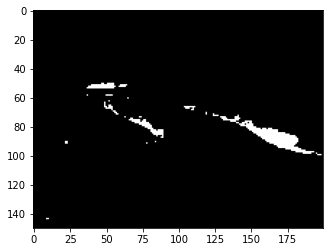

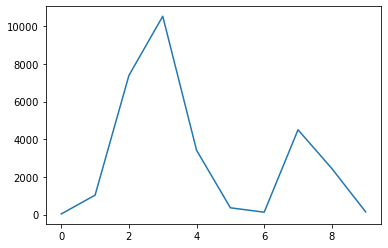

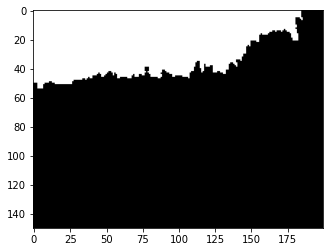

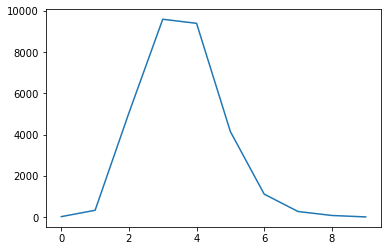

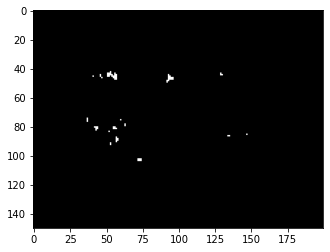

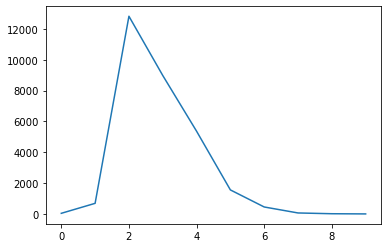

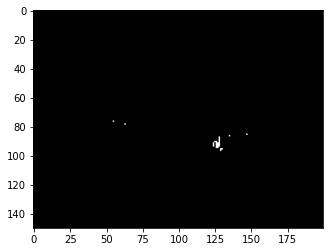

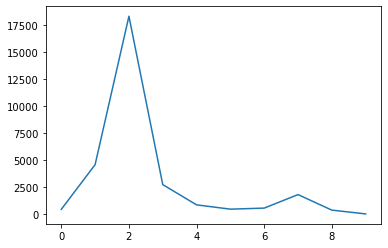

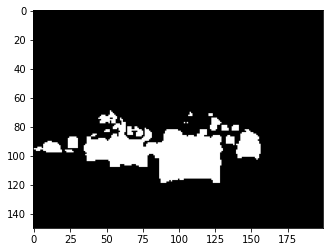

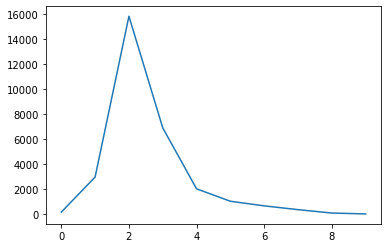

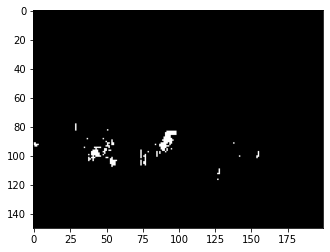

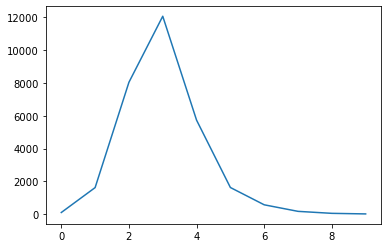

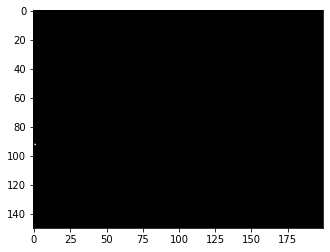

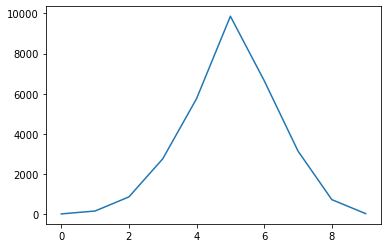

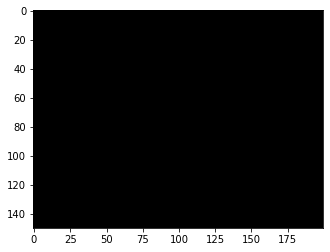

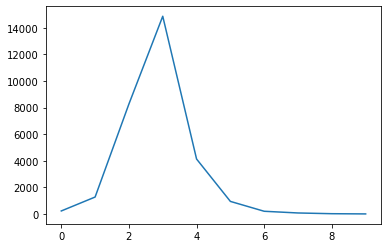

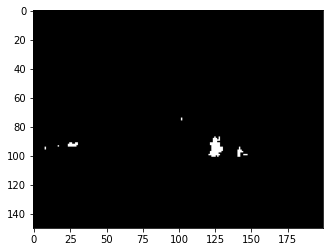

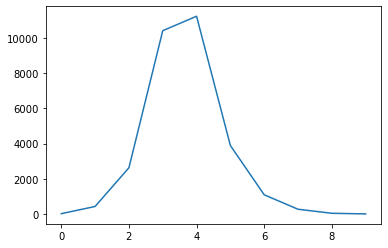

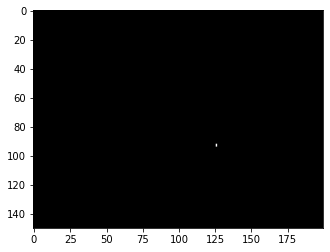

In [9]:
import numpy as np

threshold = 4

for i in range(19):
    class_frame = np.copy(inferred[:, :, i])
    hist,bins = np.histogram(class_frame.ravel())

    class_frame[class_frame < threshold] = 0
    class_frame[class_frame>= threshold] = 1
    plt.plot(hist), plt.show()
    plt.imshow(class_frame, cmap=plt.cm.gray), plt.show()